In [26]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [27]:
tem1721 = pd.read_csv("data/5년기온데이터_전처리.csv").drop(['Unnamed: 0'], axis=1)
tem17210708 = tem1721[tem1721['날짜'].str.contains(
    "2017-07|2018-07|2019-07|2020-07|2021-07")].reset_index()
tem17210708.drop('index',axis=1, inplace=True)
tem17210708

,날짜,시간,기온(°C),강수량(mm),풍속(m/s),습도(%)
0,2017-07-01,0:00,24.1,0.0,1.3,72.0
1,2017-07-01,1:00,23.7,0.0,1.4,75.0
2,2017-07-01,2:00,23.3,0.0,1.2,78.0
3,2017-07-01,3:00,23.0,0.0,1.8,80.0
4,2017-07-01,4:00,22.8,0.0,1.7,83.0
...,...,...,...,...,...,...
3715,2021-07-31,19:00,30.9,0.0,4.3,60.0
3716,2021-07-31,20:00,29.1,0.0,3.2,63.0
3717,2021-07-31,21:00,28.7,0.0,2.0,65.0
3718,2021-07-31,22:00,28.3,0.0,2.4,71.0


In [28]:
elec1721=pd.read_csv("data/fintime17_21_df.csv")
elec17210708 = elec1721[elec1721['날짜'].str.contains(
    "2017-07|2018-07|2019-07|2020-07|2021-07")].reset_index()
elec17210708.drop('index',axis=1, inplace=True)
elec17210708

,날짜,시간,수요량
0,2017-07-01,00:00,57464
1,2017-07-01,01:00,57123
2,2017-07-01,02:00,54810
3,2017-07-01,03:00,53431
4,2017-07-01,04:00,52571
...,...,...,...
3715,2021-07-31,19:00,76348
3716,2021-07-31,20:00,76776
3717,2021-07-31,21:00,75965
3718,2021-07-31,22:00,72440


In [29]:
tem17210708.drop(['시간'], axis=1, inplace=True)
elec17210708.drop(['날짜'], axis=1, inplace=True)
fin17210708 = pd.concat([tem17210708,elec17210708],axis=1)
fin17210708

,날짜,기온(°C),강수량(mm),풍속(m/s),습도(%),시간,수요량
0,2017-07-01,24.1,0.0,1.3,72.0,00:00,57464
1,2017-07-01,23.7,0.0,1.4,75.0,01:00,57123
2,2017-07-01,23.3,0.0,1.2,78.0,02:00,54810
3,2017-07-01,23.0,0.0,1.8,80.0,03:00,53431
4,2017-07-01,22.8,0.0,1.7,83.0,04:00,52571
...,...,...,...,...,...,...,...
3715,2021-07-31,30.9,0.0,4.3,60.0,19:00,76348
3716,2021-07-31,29.1,0.0,3.2,63.0,20:00,76776
3717,2021-07-31,28.7,0.0,2.0,65.0,21:00,75965
3718,2021-07-31,28.3,0.0,2.4,71.0,22:00,72440


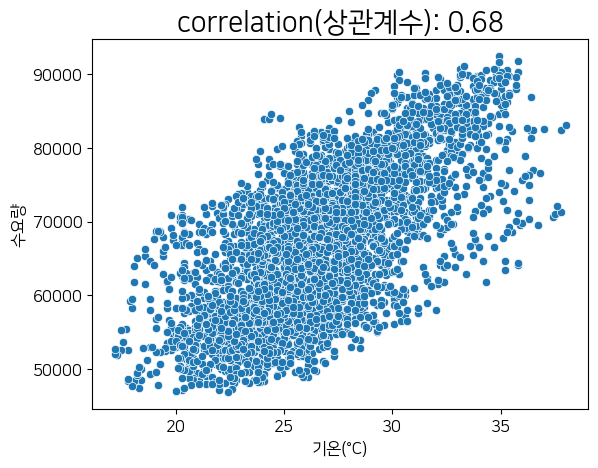

In [30]:
correlation = fin17210708['수요량'].corr(fin17210708['기온(°C)'])
sns.scatterplot(x=fin17210708['기온(°C)'], y=fin17210708['수요량'])
plt.title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
plt.xlabel("기온(°C)",fontsize=12)
plt.ylabel("수요량",fontsize=12)
plt.show()

In [31]:
y = fin17210708['수요량']
x = fin17210708.drop(columns=['날짜', '시간', '수요량'])
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
x_train, x_test, y_train, y_test

(      기온(°C)  강수량(mm)  풍속(m/s)  습도(%)
 1279    29.3      0.0      0.8   58.0
 2337    22.8      0.0      1.9   74.0
 2417    30.1      0.0      2.9   55.0
 1525    27.8      0.0      2.1   41.0
 784     25.2      0.0      0.9   87.0
 ...      ...      ...      ...    ...
 2576    20.3      0.0      1.9   74.0
 2047    25.7      0.0      1.9   85.0
 2715    22.1      0.0      0.9   89.0
 3683    32.2      0.0      1.7   57.0
 2060    26.9      0.0      0.4   80.0
 
 [2604 rows x 4 columns],
       기온(°C)  강수량(mm)  풍속(m/s)  습도(%)
 2098    23.7     15.7      0.8   97.0
 2028    29.6      0.0      2.6   63.0
 3417    29.0      0.0      2.1   68.0
 3603    28.5      0.0      1.9   65.0
 2286    21.7      0.0      1.4   86.0
 ...      ...      ...      ...    ...
 1321    28.7      0.0      2.6   67.0
 825     27.4      0.0      0.5   68.0
 271     25.2      0.0      2.4   87.0
 811     30.4      0.1      0.9   62.0
 2539    18.6      0.7      4.7   95.0
 
 [1116 rows x 4 columns],
 1279   

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

lr = LinearRegression()
lr.fit(x_train_scaled, y_train_scaled)
y_pred = lr.predict(x_test_scaled)

mse = mean_squared_error(y_test_scaled, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_scaled, y_pred)
print(f'mse:{mse}, rmse:{rmse}, r2:{r2}')

mse:0.5079046855101281, rmse:0.7126743193844775, r2:0.47954199255393415
